ML Practical 3. Assignment on Classification technique

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv("Admission_Predict.csv")

In [4]:
#Display first few rows
print("First 5 Rows of the Dataset:\n")
print(df.head(), "\n")

First 5 Rows of the Dataset:

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65   



In [5]:
#Rename target column for simplicity
df.rename(columns={'Chance of Admit ': 'Chance'}, inplace=True)

a. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if 
necessary. 

In [6]:
#Convert 'Chance' column into binary class (0 or 1)
# If Chance >= 0.75 → Admitted (1), else Not Admitted (0)
df['Admitted'] = df['Chance'].apply(lambda x: 1 if x >= 0.75 else 0)

In [8]:
#Drop old 'Chance' column
df.drop('Chance', axis=1, inplace=True)

In [9]:
#Check dataset info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admitted           400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB
None


In [10]:
#Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64


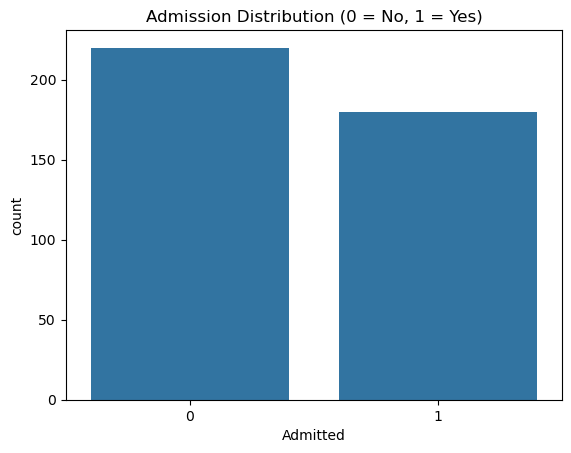

In [11]:
#Basic visualization
sns.countplot(x='Admitted', data=df)
plt.title("Admission Distribution (0 = No, 1 = Yes)")
plt.show()

b. Perform data-preparation (Train-Test Split) 

In [13]:
#Define independent (X) and dependent (y) variables
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Admitted']

In [14]:
#Split the dataset into Train and Test sets (80% - 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape : {X_test.shape}")

Training Data Shape: (320, 7)
Testing Data Shape : (80, 7)


c. Apply Machine Learning Algorithm

In [15]:
#Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [16]:
#Create model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [17]:
#Train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
#Make predictions
y_pred = dt_model.predict(X_test)

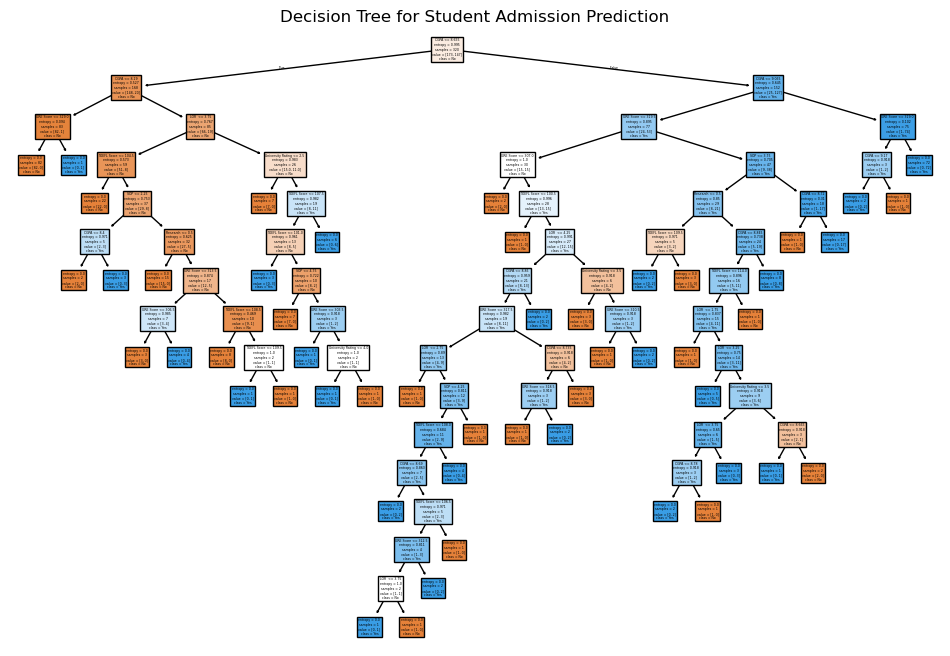

In [19]:
#Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Student Admission Prediction")
plt.show()

d. Evaluate Model. 

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [21]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%\n")

Model Accuracy: 88.75%



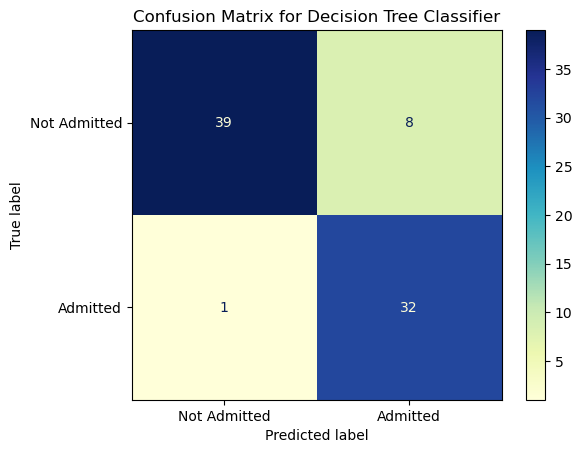

In [22]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Admitted', 'Admitted'])
disp.plot(cmap='YlGnBu')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [23]:
#Detailed Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        47
           1       0.80      0.97      0.88        33

    accuracy                           0.89        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.89      0.89        80

